<a href="https://colab.research.google.com/github/Forough-fbv/DS-in-Golang/blob/master/x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Colab Notebooks/clean_data.csv'
df = pd.read_csv(file_path)
df = df.drop(df.columns[0], axis=1)
df

,color,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,imdb_binned
0,1,620,178.0,0.0,855.0,1001,1000.0,760505847.0,91,189,...,9,43,7,237000000.0,66,936.0,7.9,7,33000,HIT
1,1,538,169.0,563.0,1000.0,1591,40000.0,309404152.0,85,686,...,9,43,7,300000000.0,64,5000.0,7.1,12,0,HIT
2,1,1394,148.0,0.0,161.0,1794,11000.0,200074175.0,107,258,...,9,42,7,245000000.0,72,393.0,6.8,12,85000,HIT
3,1,251,164.0,22000.0,23000.0,380,27000.0,448130642.0,243,1339,...,9,43,7,250000000.0,69,23000.0,8.5,12,164000,HIT
4,1,62,132.0,475.0,530.0,1836,640.0,73058679.0,105,322,...,9,43,7,263700000.0,69,632.0,6.6,12,24000,HIT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1,1167,110.0,107.0,45.0,299,576.0,136007.0,687,867,...,11,13,9,4500.0,61,133.0,6.9,12,171,HIT
3751,1,612,90.0,397.0,0.0,1521,5.0,673780.0,635,449,...,25,22,5,10000.0,57,0.0,7.5,8,697,HIT
3752,1,1424,77.0,291.0,8.0,517,291.0,424760.0,708,1232,...,9,43,7,7000.0,61,45.0,7.0,8,19000,HIT
3753,1,1343,81.0,0.0,6.0,1654,121.0,2040920.0,168,198,...,29,43,9,7000.0,49,20.0,6.9,2,0,HIT


In [ ]:
(df.columns)

Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes', 'imdb_binned'],
      dtype='object')

In [ ]:
#CLASSIFICATION

#Split the data as x and y.
    #x means independent variables
    #y means dependent variables

Y = df['imdb_score']
X = df.drop(['imdb_score','imdb_binned'], axis=1)
X.columns

Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
#Splitting and Training Data
#We split the dataset 70:30 (%70 for training the model, %30 for testing the model )

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)


(2628, 23)
(2628,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming X_train is a pandas DataFrame before scaling
column_names = X_train.columns  # Save original column names

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

# Convert the scaled array back to a DataFrame and reattach the column names
X_train = pd.DataFrame(X_train_scaled, columns=column_names)


In [ ]:
print(y_train.head())
print(y_train.dtype)


3638    7.2
2316    5.4
3378    6.9
564     7.1
1313    7.8
Name: imdb_score, dtype: float64
float64


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV

clf_rf_regressor = RandomForestRegressor(random_state=0)
rfecv = RFECV(estimator=clf_rf_regressor, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)


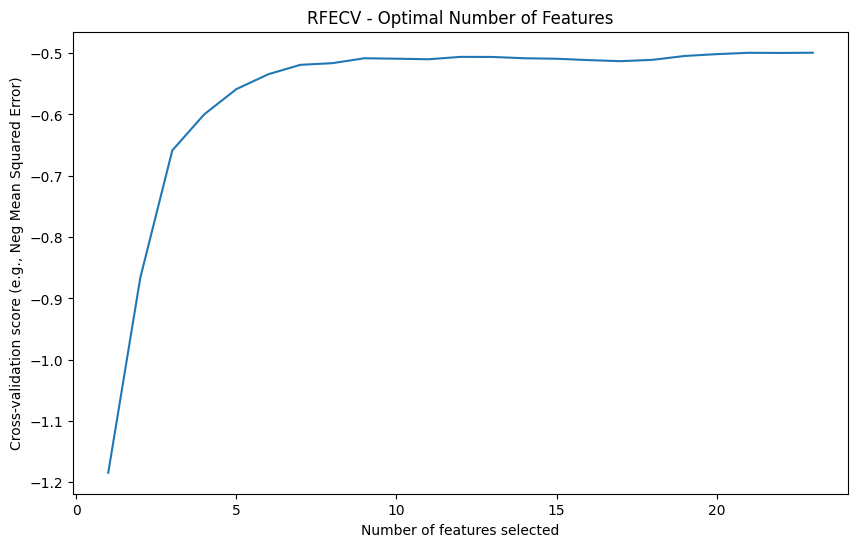

Optimal number of features : 23


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.title("RFECV - Optimal Number of Features")
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (e.g., Neg Mean Squared Error)")
# Assuming 'cv_results_' is the correct attribute for your scikit-learn version:
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)

In [ ]:
selected_features = X_train.columns[rfecv.support_]
print("Selected features:")
print(selected_features)

Selected features:
Index(['color', 'director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'num_voted_users', 'actor_3_name',
       'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews',
       'language', 'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')


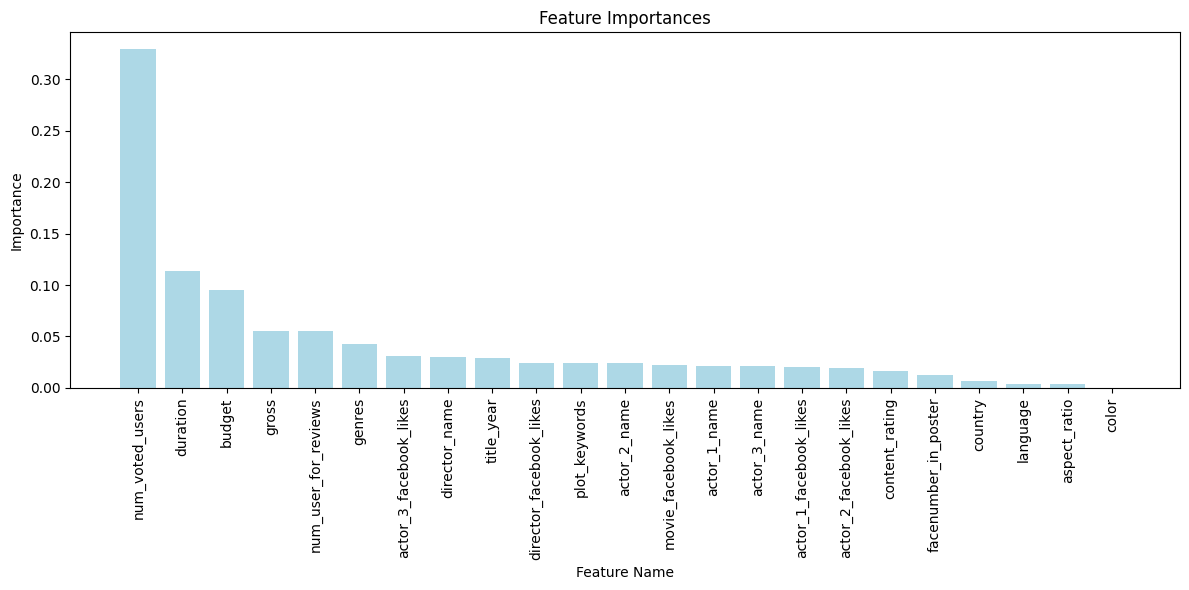

In [ ]:
feature_importances = rfecv.estimator_.feature_importances_

# Ensure that selected features use actual column names
selected_features = X_train.columns[rfecv.support_]

# Creating indices sorted by importance and sorting feature names accordingly
indices = np.argsort(feature_importances)[::-1]
sorted_features = [selected_features[i] for i in indices]

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(indices)), feature_importances[indices], color='lightblue', align='center')
plt.xticks(range(len(indices)), [selected_features[index] for index in indices], rotation=90)
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
feature_importances = rfecv.estimator_.feature_importances_

# Ensure that selected features use actual column names
selected_features = X_train.columns[rfecv.support_]

# Create a DataFrame from the feature importances
feature_importance_df = pd.DataFrame({
    'Feature Name': selected_features,
    'Importance': feature_importances
})

# Sort the DataFrame by 'Importance' in descending order
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Display the sorted DataFrame
print(sorted_feature_importance_df)

               Feature Name  Importance
0           num_voted_users    0.329413
1                  duration    0.113470
2                    budget    0.094883
3                     gross    0.055392
4      num_user_for_reviews    0.055231
5                    genres    0.042949
6    actor_3_facebook_likes    0.030886
7             director_name    0.030011
8                title_year    0.028773
9   director_facebook_likes    0.024172
10            plot_keywords    0.023988
11             actor_2_name    0.023799
12     movie_facebook_likes    0.021892
13             actor_1_name    0.021091
14             actor_3_name    0.021003
15   actor_1_facebook_likes    0.020104
16   actor_2_facebook_likes    0.019740
17           content_rating    0.016241
18     facenumber_in_poster    0.012582
19                  country    0.006815
20                 language    0.003698
21             aspect_ratio    0.003578
22                    color    0.000288


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # or RandomForestRegressor

# Initialize the model
clf = RandomForestRegressor(random_state=0)

# Fit the model using only the selected features
clf.fit(X_train[selected_features], y_train)


RandomForestRegressor(random_state=0)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Predict on the test set (make sure to transform the test set similarly as the train set)
X_test_scaled = sc.transform(X_test)  # Assuming scaling is necessary
X_test_selected = pd.DataFrame(X_test_scaled, columns=X_test.columns)[selected_features]

# Predict on the test set
y_pred = clf.predict(X_test_selected)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared Score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)


Mean Absolute Error: 0.515321206743567
Mean Squared Error: 0.4826061322094055
R-squared: 0.5604043425361371


In [ ]:
from sklearn.model_selection import GridSearchCV

# Adjust parameters for the regressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [4, 6, 8]
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train[selected_features], y_train)

print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best parameters: {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
Best MSE: 0.5282063181213951


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train[selected_features], y_train, cv=10, scoring='neg_mean_squared_error')
print("Average MSE:", -scores.mean())
print("Standard deviation:", scores.std())


Average MSE: 0.49831881832786695
Standard deviation: 0.07731012846254687


In [ ]:
# Create a new DataFrame with unscaled features, y_test, and y_pred
results_df = X_test.copy()  # Use the original X_test with unscaled features
results_df['y_test'] = y_test
# Round y_pred to one decimal place
results_df['y_pred'] = y_pred

y_pred= y_pred.round(3)

# Display the first 25 rows with formatting
print(results_df.head(25).to_string())
print(results_df.head(25).style.highlight_max(subset=['y_test', 'y_pred'], color='lightgreen'))

results_df.head(25).to_html('movie_predictions_son.html')


      color  director_name  duration  director_facebook_likes  actor_3_facebook_likes  actor_2_name  actor_1_facebook_likes        gross  genres  actor_1_name  num_voted_users  actor_3_name  facenumber_in_poster  plot_keywords  num_user_for_reviews  language  country  content_rating       budget  title_year  actor_2_facebook_likes  aspect_ratio  movie_facebook_likes  y_test  y_pred
953       1           1572     118.0                    670.0                   294.0           290                  6000.0   25450527.0     167          1001            80196           185                   0.0           1141                 190.0         9       43               9   50000000.0          66                   450.0            12                     0     6.5     6.2
2415      1           1336      94.0                     11.0                   232.0          1795                  1000.0   22189039.0     168           775            17074          1277                   0.0           1893    

In [ ]:
###### SKIPPING THIS PART SINCE WE HAD TRANSFORMATION OF STRINGS



from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Optimal parameters from GridSearch
optimal_params = {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}

# Initialize and train the RandomForestRegressor with the best parameters
optimized_clf = RandomForestRegressor(max_depth=optimal_params['max_depth'],
                                      max_features=optimal_params['max_features'],
                                      n_estimators=optimal_params['n_estimators'],
                                      random_state=0)
optimized_clf.fit(X_train[selected_features], y_train)

# Example new data input using the selected features
new_data = {
    'num_voted_users': [88000],                # example number of users who voted
    'duration': [120],                         # example duration in minutes
    'budget': [30000000],                      # example budget
    'gross': [100000000],                      # example gross revenue
    'num_user_for_reviews': [300],             # example number of user reviews
    'genres': ['Action|Adventure|Sci-Fi'],     # example movie genres
    'actor_3_facebook_likes': [2000],         # example Facebook likes for actor 3
    'director_name': ['James Cameron'],        # example director name
    'title_year': [2009],                      # example release year
    'director_facebook_likes': [1000],        # example director Facebook likes
    'plot_keywords': ['avatar|future|marine'], # example plot keywords
    'actor_2_name': ['Zoe Saldana'],           # example actor 2 name
    'movie_facebook_likes': [3000],            # example movie Facebook likes
    'actor_1_name': ['CCH Pounder'],           # example actor 1 name
    'actor_3_name': ['Wes Studi'],             # example actor 3 name
    'actor_1_facebook_likes': [10000],         # example Facebook likes for actor 1
    'actor_2_facebook_likes': [5000],          # example Facebook likes for actor 2
    'content_rating': ['PG-13'],               # example content rating
    'facenumber_in_poster': [1],               # example number of faces in movie poster
    'country': ['USA'],                        # example country
    'language': ['English'],                   # example language
    'aspect_ratio': [1.78],                    # example aspect ratio
    'color': [1]                         # example color
}

# Create a DataFrame for the new data
new_sample = pd.DataFrame(new_data)

# Use the same scaler to transform the new data
scaler = StandardScaler().fit(X_train[selected_features])  # Fit scaler to the training data with selected features
scaled_new_sample = scaler.transform(new_sample[selected_features])

# Predict using the optimized model
predicted_score = optimized_clf.predict(scaled_new_sample)

# Output the predicted score
print("Predicted IMDb score:", predicted_score[0])


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


ValueError: could not convert string to float: 'Action|Adventure|Sci-Fi'